___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


## Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






## Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100) 
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

```For the EDA process of the data to be used, see:```
<br>
<sub>https://github.com/muhsinayaz/my-projects/tree/main/01-Data-Analysis-%26-Visualization-wPy/DAwPython-Capstone-AutoScout-Project</sub>

In [197]:
df = pd.read_csv("part3_final_scout_not_dummy.csv")

In [198]:
df = pd.concat([df.drop(columns="price"), df["price"]], axis=1)
# Yorumlaması kolay olması için target feature son sıraya aldım.

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15909 entries, 0 to 15908
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make_model                   15909 non-null  object 
 1   body_type                    15909 non-null  object 
 2   km                           15909 non-null  float64
 3   type                         15909 non-null  object 
 4   previous_owners              15909 non-null  float64
 5   inspection_new               15909 non-null  int64  
 6   gearing_type                 15909 non-null  object 
 7   drive_chain                  15909 non-null  object 
 8   fuel                         15909 non-null  object 
 9   co2_emission                 15909 non-null  float64
 10  extras                       15909 non-null  object 
 11  gears                        15909 non-null  float64
 12  age                          15909 non-null  float64
 13  hp_kW           

In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
km,15909.000,32092.437,36982.839,0.000,1913.000,20410.000,46900.000,317000.000
previous_owners,15909.000,1.008,0.368,0.000,1.000,1.000,1.000,4.000
inspection_new,15909.000,0.344,0.475,0.000,0.000,0.000,1.000,1.000
co2_emission,15909.000,117.783,18.023,45.000,104.000,117.000,129.000,253.000
gears,15909.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15909.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
hp_kW,15909.000,88.494,26.672,40.000,66.000,85.000,103.000,294.000
displacement_cc,15909.000,1428.657,275.852,890.000,1229.000,1461.000,1598.000,2967.000
weight_kg,15909.000,1337.675,199.672,840.000,1165.000,1295.000,1472.000,2471.000
comb_consumption,15909.000,4.824,0.888,3.000,4.000,4.800,5.400,9.100


<AxesSubplot:>

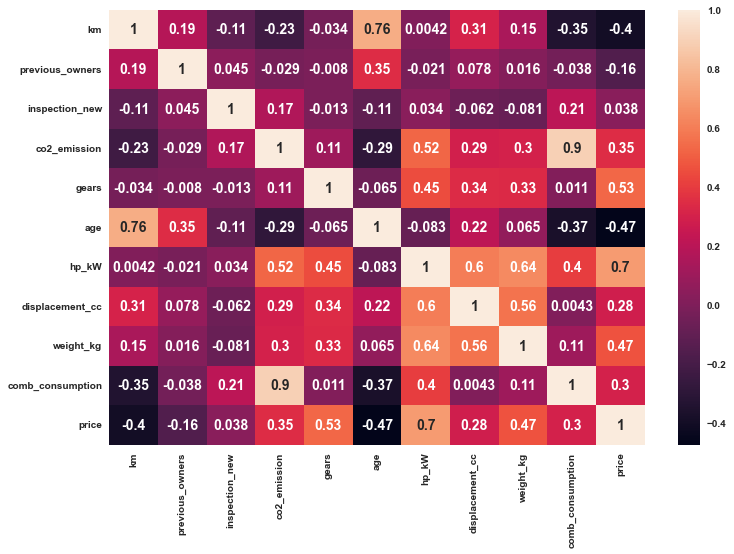

In [201]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [202]:
df[df.select_dtypes('object').columns].head().T


,0,1,2,3,4
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
type,Used,Used,Used,Used,Used
gearing_type,Automatic,Automatic,Automatic,Automatic,Automatic
drive_chain,front,front,front,front,front
fuel,Diesel,Benzine,Diesel,Diesel,Diesel
extras,"Alloy wheels, Catalytic Converter, Voice Control","Alloy wheels, Sport seats, Sport suspension, V...","Alloy wheels, Voice Control","Alloy wheels, Sport seats, Voice Control","Alloy wheels, Sport package, Sport suspension,..."
upholstery_type,Cloth,Cloth,Cloth,Cloth,Cloth
comfort_convenience_package,Premium,Standard,Premium,Standard,Premium
entertainment_media_package,Plus,Plus,Standard,Plus,Plus


## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal. 

### Converting the Extras feature from object to numeric

In [203]:
df["extras"] = df["extras"].apply(lambda x: x.count(",")).add(1)

In [204]:
df["extras"].value_counts()

1     7009
2     3391
3     2684
4     1404
5      743
6      409
7      174
8       60
9       28
10       7
Name: extras, dtype: int64

## multicollinearity control

In [205]:
def color_red(val):
    
    if (val > 0.80 and val < 1) or (val < -0.80 and val > -1):
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'
pd.DataFrame(df).corr().style.applymap(color_red)

,km,previous_owners,inspection_new,co2_emission,extras,gears,age,hp_kW,displacement_cc,weight_kg,comb_consumption,price
km,1.000000,0.185958,-0.111360,-0.227643,0.018517,-0.033823,0.758370,0.004170,0.306792,0.147246,-0.345228,-0.399443
previous_owners,0.185958,1.000000,0.044580,-0.029036,0.040446,-0.008038,0.347237,-0.020520,0.078121,0.016488,-0.038152,-0.159027
inspection_new,-0.111360,0.044580,1.000000,0.168983,0.152879,-0.012870,-0.110088,0.034327,-0.061677,-0.080866,0.207112,0.038432
co2_emission,-0.227643,-0.029036,0.168983,1.000000,0.225945,0.106238,-0.288244,0.522774,0.288524,0.298420,0.896207,0.347669
extras,0.018517,0.040446,0.152879,0.225945,1.000000,0.225042,-0.025736,0.354481,0.215360,0.149501,0.178099,0.251408
gears,-0.033823,-0.008038,-0.012870,0.106238,0.225042,1.000000,-0.064770,0.449727,0.339270,0.333763,0.011110,0.530879
age,0.758370,0.347237,-0.110088,-0.288244,-0.025736,-0.064770,1.000000,-0.083334,0.215304,0.065081,-0.371941,-0.473689
hp_kW,0.004170,-0.020520,0.034327,0.522774,0.354481,0.449727,-0.083334,1.000000,0.597708,0.638395,0.403492,0.696532
displacement_cc,0.306792,0.078121,-0.061677,0.288524,0.215360,0.339270,0.215304,0.597708,1.000000,0.563594,0.004314,0.282075
weight_kg,0.147246,0.016488,-0.080866,0.298420,0.149501,0.333763,0.065081,0.638395,0.563594,1.000000,0.105840,0.468264


In [206]:
# comb_consumption	vs co2_emission

### Object Columns

In [207]:
object_columns = df.select_dtypes("object").columns
object_columns

Index(['make_model', 'body_type', 'type', 'gearing_type', 'drive_chain',
       'fuel', 'upholstery_type', 'comfort_convenience_package',
       'entertainment_media_package', 'safety_security_package'],
      dtype='object')

In [208]:
for i in df.select_dtypes("object").columns:
    print(df[i].value_counts(),end="\n"+"-"*40+"\n")

Audi A3           3093
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1838
Renault Espace     991
Renault Duster      34
Name: make_model, dtype: int64
----------------------------------------
Sedans           8000
Station wagon    3677
Compact          3239
Van               817
Transporter        88
Off-Road           55
Coupe              25
Convertible         8
Name: body_type, dtype: int64
----------------------------------------
Used              11090
New                1649
Pre-registered     1364
Employee's car     1010
Demonstration       796
Name: type, dtype: int64
----------------------------------------
Manual            8148
Automatic         7296
Semi-automatic     465
Name: gearing_type, dtype: int64
----------------------------------------
front    15701
4WD        204
rear         4
Name: drive_chain, dtype: int64
----------------------------------------
Benzine    8548
Diesel     7297
LPG/CNG      64
Na

In [209]:
# Ordinallik mevcut olan sütunlarda(comfort_convenience_package, entertainment_media_package, 
# safety_security_package) OrdinalEncoder
# Diğerleri için ise OneHotEncoder uygulayacağım.

## Outliers in Price Column

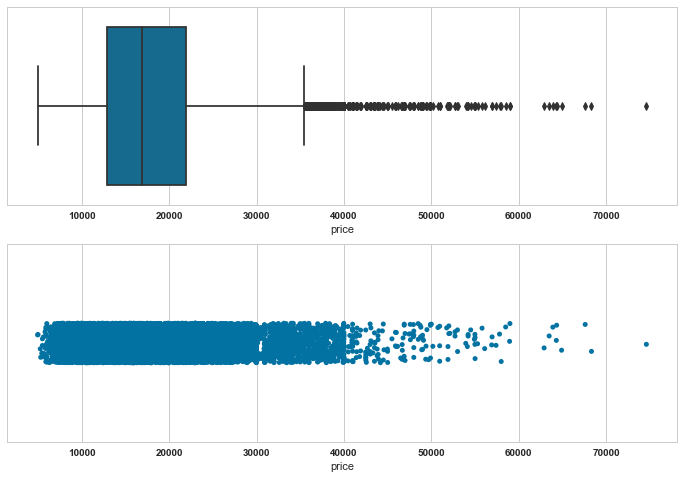

In [210]:
plt.subplot(211)
sns.boxplot(df.price)
plt.subplot(212)
sns.stripplot(df.price);
# 40k üzeri için outlier durumu mevcut olabilir.

<AxesSubplot:xlabel='make_model', ylabel='price'>

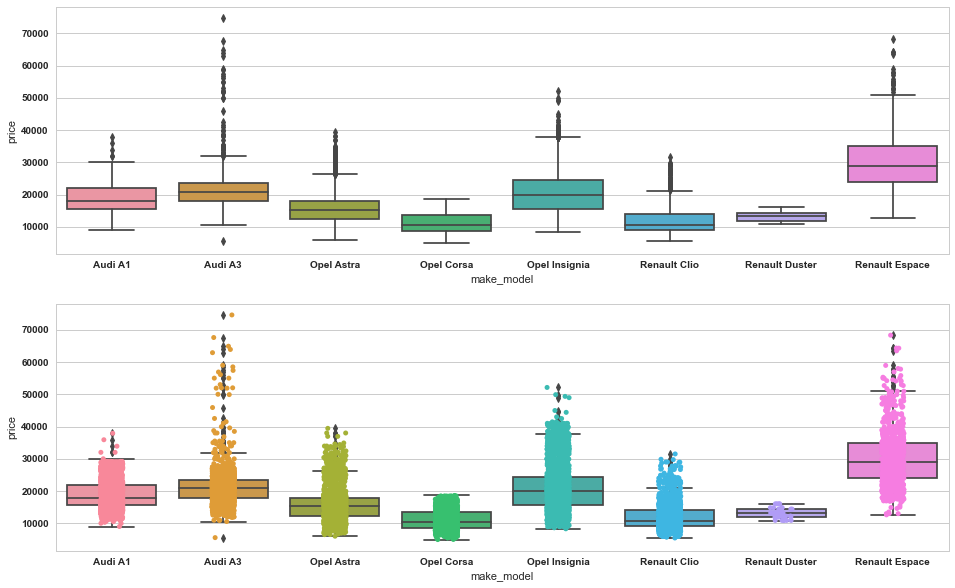

In [211]:
plt.figure(figsize=(16,10))
plt.subplot(211)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)

plt.subplot(212)
sns.boxplot(x="make_model", y="price", data=df, whis=1.5)
sns.stripplot(x="make_model", y="price", data=df)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [212]:
X = df.drop(columns = "price", axis =1)
y = df["price"]

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
X_train.select_dtypes('object').columns

Index(['make_model', 'body_type', 'type', 'gearing_type', 'drive_chain',
       'fuel', 'upholstery_type', 'comfort_convenience_package',
       'entertainment_media_package', 'safety_security_package'],
      dtype='object')

### OneHotEncoder  and OrdinalEncoder

- Use Pipeline()

In [215]:
# PipeLine kullanacağım için değişkenleri tanımadım.

In [216]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [217]:
cat_features_one  = ['make_model', 'body_type', 'type', 'gearing_type', 'drive_chain','fuel',  'upholstery_type']
cat_features_ord = ["entertainment_media_package", "comfort_convenience_package", "safety_security_package"]

In [218]:
enc_one = OneHotEncoder(handle_unknown="ignore",
                         sparse=False)

In [219]:
entertainment_cat = ['Standard', 'Plus']
comfort_cat = ['Standard','Premium','Premium Plus']
safety_cat = ['Safety Standard Package','Safety Premium Package', 'Safety Premium Plus Package']

In [220]:
enc_ord = OrdinalEncoder(handle_unknown="use_encoded_value",
                         unknown_value=-1,
                         categories=[entertainment_cat, comfort_cat, safety_cat])

## Scaler

In [221]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

In [222]:
numeric_columns = X.select_dtypes("number").columns
numeric_columns

Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object')

In [241]:
from sklearn.compose import make_column_transformer

column_trans = make_column_transformer((enc_one, cat_features_one), 
                                        (enc_ord, cat_features_ord),
                                        (scaler, numeric_columns),
                                        remainder="passthrough"
                                        )

# make_column_transformer fonksiyonu featurlara yapılacak dönüşümleri otomotize eder. Bu fonksiyonun içerisine vereceğimiz
# sırlamaya göre featurlara sıra ile dönüşüm uygular.

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [52]:
lm = LinearRegression()

operations = [("Scaler_Encoder", column_trans), ("LinearRegression", lm)]
pipe_model = Pipeline(operations)

In [53]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('LinearRegression', LinearRegression())])

In [54]:
y_pred = pipe_model.predict(X_test)
y_train_pred = pipe_model.predict(X_train)

In [90]:
# Pre-defined functions
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided. 

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2 

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features 

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


In [56]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.692374e-01,8.641590e-01
mae,1.850527e+03,1.862766e+03
mse,7.081113e+06,7.537574e+06
rmse,2.661036e+03,2.745464e+03


In [58]:
pd.options.display.float_format = '{:.3f}'.format


In [61]:
train_val(pipe_model, X_train, y_train, X_test, y_test)
#  Okunabilir olması için yukarıdaki kodu çalıştırdık.

,train,test
R2,0.869,0.864
mae,1850.527,1862.766
mse,7081113.380,7537573.747
rmse,2661.036,2745.464


In [62]:
adj_r2(y_test, y_pred, X)

0.8639794433925669

## Cross Validate

In [65]:
from sklearn.model_selection import cross_validate, cross_val_score


In [64]:
from sklearn.metrics import SCORERS
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_s

In [66]:
pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, X_train, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                    'neg_root_mean_squared_error'], cv = 10, return_train_score=True)

In [70]:
pd.DataFrame(scores).mean()
# train ve validaiton seti ile train seti arasındaki skorların biribirine yakın olduğunu görüyoruz. Overfiting yoktur.

fit_time                                   0.067
score_time                                 0.010
test_r2                                    0.868
train_r2                                   0.869
test_neg_mean_absolute_error           -1858.239
train_neg_mean_absolute_error          -1851.743
test_neg_mean_squared_error         -7148816.706
train_neg_mean_squared_error        -7080461.923
test_neg_root_mean_squared_error       -2671.394
train_neg_root_mean_squared_error      -2660.884
dtype: float64

## Prediction Error with Outliers

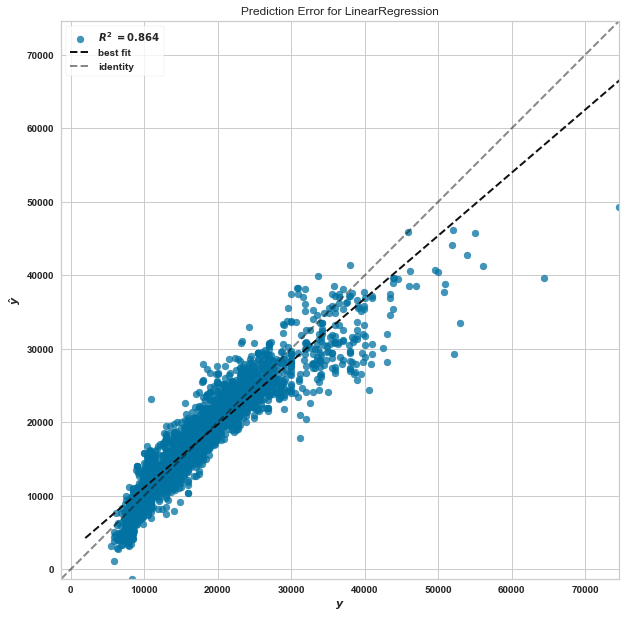

In [74]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
pipe_model = Pipeline(operations)
visualizer = PredictionError(pipe_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## Residual Plot

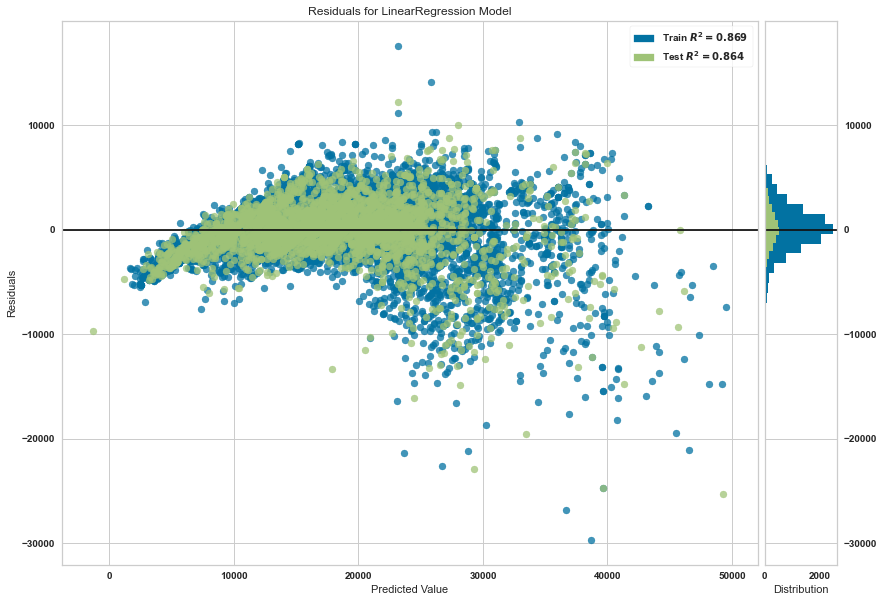

In [75]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
pipe_model = Pipeline(operations)
visualizer = ResidualsPlot(pipe_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    


## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

In [76]:
df2 = df.copy()

In [77]:
for model in df2.make_model.unique():
    
    car_prices = df2[df2["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
    df2.reset_index(drop=True, inplace=True)
df2.head()
# ilk olarak IQR e göre outlierları çıkarttım

,make_model,body_type,km,type,previous_owners,inspection_new,gearing_type,drive_chain,fuel,co2_emission,extras,gears,age,hp_kW,upholstery_type,displacement_cc,weight_kg,comb_consumption,comfort_convenience_package,entertainment_media_package,safety_security_package,price
0,Audi A1,Sedans,56013.000,Used,2.000,1,Automatic,front,Diesel,99.000,3,7.000,3.000,66.000,Cloth,1422.000,1220.000,3.800,Premium,Plus,Safety Premium Package,15770
1,Audi A1,Sedans,80000.000,Used,2.000,0,Automatic,front,Benzine,129.000,4,7.000,2.000,141.000,Cloth,1798.000,1255.000,5.600,Standard,Plus,Safety Premium Package,14500
2,Audi A1,Sedans,83450.000,Used,1.000,0,Automatic,front,Diesel,99.000,2,7.000,3.000,85.000,Cloth,1598.000,1135.000,3.800,Premium,Standard,Safety Premium Package,14640
3,Audi A1,Sedans,73000.000,Used,1.000,0,Automatic,front,Diesel,99.000,3,6.000,3.000,66.000,Cloth,1422.000,1195.000,3.800,Standard,Plus,Safety Premium Package,14500
4,Audi A1,Sedans,16200.000,Used,1.000,1,Automatic,front,Diesel,109.000,4,7.000,3.000,66.000,Cloth,1422.000,1135.000,4.100,Premium,Plus,Safety Premium Package,16790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15488,Renault Espace,Van,1647.363,New,1.000,0,Automatic,front,Diesel,139.000,2,6.000,0.000,147.000,Part/Full Leather,1997.000,1758.000,5.300,Premium,Plus,Safety Premium Package,39950
15489,Renault Espace,Van,9900.000,Used,1.000,1,Automatic,front,Benzine,168.000,3,7.000,0.000,165.000,Cloth,1798.000,1708.000,7.400,Premium,Plus,Safety Premium Package,39885
15490,Renault Espace,Van,15.000,Pre-registered,1.000,1,Automatic,front,Diesel,139.000,1,6.000,0.000,146.000,Part/Full Leather,1997.000,1734.000,5.300,Standard,Plus,Safety Premium Package,39875
15491,Renault Espace,Van,10.000,Pre-registered,1.000,0,Automatic,front,Diesel,139.000,2,6.000,0.000,147.000,Part/Full Leather,1997.000,1758.000,5.300,Standard,Plus,Safety Premium Package,39700


### Model without outliers

In [79]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
pipe_model = Pipeline(operations)
pipe_model.fit(X_train,y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('LinearRegression', LinearRegression())])

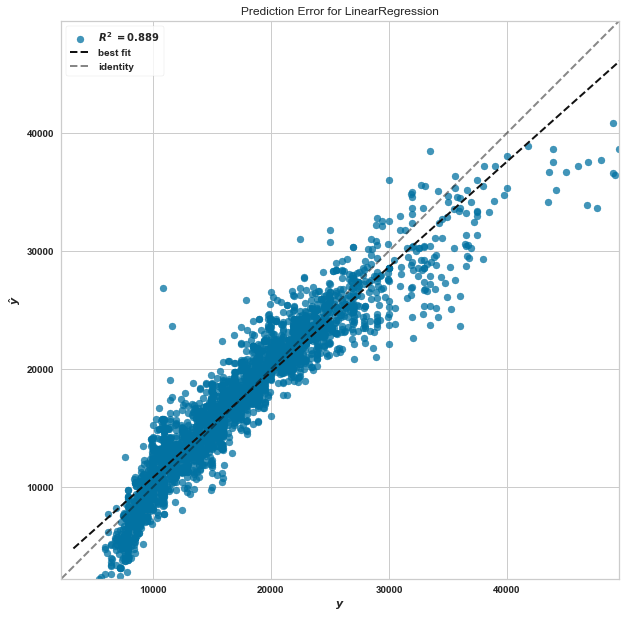

In [81]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
pipe_model = Pipeline(operations)
visualizer = PredictionError(pipe_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

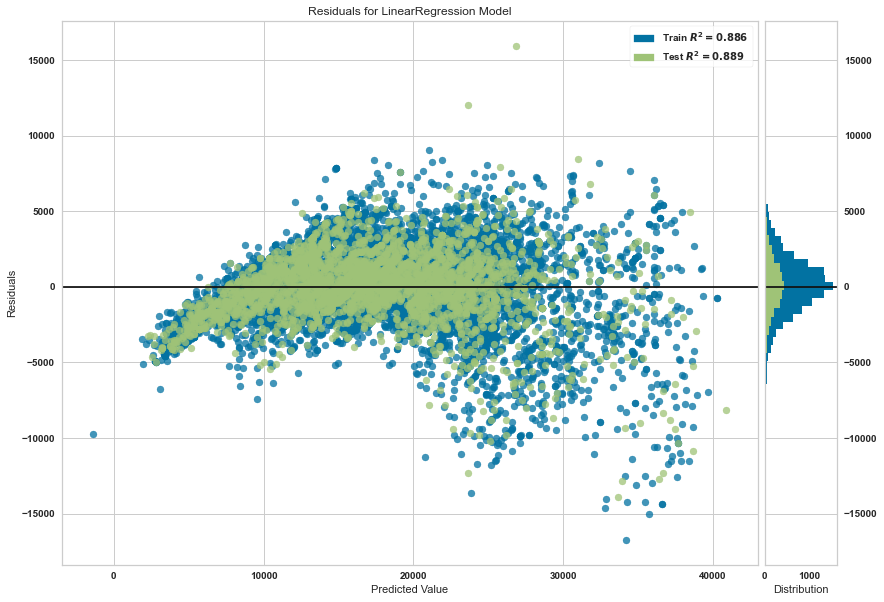

In [82]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
pipe_model = Pipeline(operations)
visualizer = ResidualsPlot(pipe_model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();    


In [94]:
train_val(pipe_model, X_train, y_train, X_test, y_test)
# Beklendiği gibi değerlerde iyileşme var

,train,test
R2,0.886,0.889
mae,1637.358,1607.618
mse,5222336.504,4977197.908
rmse,2285.243,2230.963


In [84]:
2260/df2.price.mean()
# hatamız %14.55'den %12,85'e düştü

0.12856633284963626

In [87]:
pipe_model = Pipeline(operations)
scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)

scores = pd.DataFrame(scores)
scores.iloc[:,2:].mean()

# yeni datamıza göre overfiting kontrolü yapıyoruz.
# train ve validation skorları yakın olduğundan overfiting problemi yok diyebiliriz.

test_r2                                    0.885
train_r2                                   0.886
test_neg_mean_absolute_error           -1642.442
train_neg_mean_absolute_error          -1635.926
test_neg_mean_squared_error         -5269281.200
train_neg_mean_squared_error        -5219939.558
test_neg_root_mean_squared_error       -2293.100
train_neg_root_mean_squared_error      -2284.687
dtype: float64

In [97]:
linear_score = train_val(pipe_model, X_train, y_train, X_test, y_test).rename(
                columns = {"train":"linear_train", "test":"linear_test"})
linear_score
# Modelleri karşılaştırmak için değişkenlere atıyorum

,linear_train,linear_test
R2,0.886,0.889
mae,1637.358,1607.618
mse,5222336.504,4977197.908
rmse,2285.243,2230.963


## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

In [98]:
from sklearn.linear_model import Ridge

In [99]:
operations = [("Scaler_Encoder", column_trans), ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('Ridge', Ridge())])

In [100]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.886,0.890
mae,1635.049,1601.974
mse,5219516.151,4952148.265
rmse,2284.626,2225.342


## Cross Validation

In [102]:
ridge_model = Pipeline(steps=operations)

scores = cross_validate(ridge_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                        'neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)
scores = pd.DataFrame(scores)
scores.iloc[:,2:].mean()

test_r2                                    0.885
train_r2                                   0.886
test_neg_mean_absolute_error           -1641.143
train_neg_mean_absolute_error          -1634.712
test_neg_mean_squared_error         -5264992.102
train_neg_mean_squared_error        -5217279.795
test_neg_root_mean_squared_error       -2292.128
train_neg_root_mean_squared_error      -2284.106
dtype: float64

## Finding best alpha for Ridge

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [105]:
operations = [("Scaler_Encoder", column_trans), ("Ridge", Ridge())]
ridge_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space} 

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [106]:
pipe_model.get_params()

{'memory': None,
 'steps': [('Scaler_Encoder',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    ['make_model', 'body_type', 'type',
                                     'gearing_type', 'drive_chain', 'fuel',
                                     'upholstery_type']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Standard',
                                                                'Plus'],
                                                               ['Standard',
                                                                'Premium',
                                                                'Premium Plus'],
                                                               ['Safety Standard '
                                    

In [107]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Scaler_Encoder',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'type',
                                                                          'gearing_type',
                                                                          'drive_chain',
                                                                          'fuel',
                                                                          'upholstery_type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Standard',
                                                                                                     'Plus'],
                                                                                                    ['Standard',
                                                                                                     'Premium',
                                                                                                     'Premium '
                                                                                                     '...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [108]:
ridge_grid_model.best_estimator_

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('Ridge', Ridge(alpha=1.02))])

In [109]:
ridge_grid_model.best_params_

{'Ridge__alpha': 1.02}

In [110]:
operations = [("Scaler_Encoder", column_trans), ("Ridge", Ridge(alpha=1.02))]
ridge_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space} 

ridge_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [111]:
operations = [("Scaler_Encoder", column_trans), ("Ridge", Ridge(alpha=1.02))]

ridge_model = Pipeline(steps=operations)

ridge_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('Ridge', Ridge(alpha=1.02))])

In [113]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.886,0.890
mae,1635.044,1601.940
mse,5219565.065,4951971.287
rmse,2284.637,2225.303


In [115]:
Ridge_score = train_val(pipe_model, X_train, y_train, X_test, y_test).rename(
                columns = {"train":"Ridge_train", "test":"Ridge_test"})
compare_score = pd.concat([linear_score, Ridge_score], axis=1)
compare_score

,linear_train,linear_test,Ridge_train,Ridge_test
R2,0.886,0.889,0.886,0.890
mae,1637.358,1607.618,1635.049,1601.974
mse,5222336.504,4977197.908,5219516.151,4952148.265
rmse,2285.243,2230.963,2284.626,2225.342


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [117]:
from sklearn.linear_model import Lasso

In [118]:
operations = [("Scaler_Encoder", column_trans), ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('Lasso', Lasso())])

In [119]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.886,0.890
mae,1635.044,1601.940
mse,5219565.065,4951971.287
rmse,2284.637,2225.303


## Cross Validation

In [120]:
lasso_model = Pipeline(steps=operations)

scores = cross_validate(lasso_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                        'neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)
scores = pd.DataFrame(scores)
scores.iloc[:,2:].mean()

test_r2                                    0.886
train_r2                                   0.886
test_neg_mean_absolute_error           -1641.178
train_neg_mean_absolute_error          -1636.119
test_neg_mean_squared_error         -5260530.868
train_neg_mean_squared_error        -5222886.409
test_neg_root_mean_squared_error       -2291.158
train_neg_root_mean_squared_error      -2285.333
dtype: float64

## Finding best alpha for Lasso

In [121]:
alpha_space = np.linspace(0.01, 100, 100)

In [122]:
operations = [("Scaler_Encoder", column_trans), ("Lasso", Lasso())]
lasso_model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space} 

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [123]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Scaler_Encoder',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'type',
                                                                          'gearing_type',
                                                                          'drive_chain',
                                                                          'fuel',
                                                                          'upholstery_type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Standard',
                                                                                                     'Plus'],
                                                                                                    ['Standard',
                                                                                                     'Premium',
                                                                                                     'Premium '
                                                                                                     '...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [124]:
lasso_grid_model.best_params_

{'Lasso__alpha': 1.02}

In [125]:
operations = [("Scaler_Encoder", column_trans), ("Lasso", Lasso(alpha=1.02))]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('Lasso', Lasso())])

In [126]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.886,0.890
mae,1635.044,1601.940
mse,5219565.065,4951971.287
rmse,2284.637,2225.303


In [127]:
Lasso_score = train_val(pipe_model, X_train, y_train, X_test, y_test).rename(
                columns = {"train":"Lasso_train", "test":"Lasso_test"})
compare_score = pd.concat([compare_score, Lasso_score], axis=1)
compare_score

,linear_train,linear_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test
R2,0.886,0.889,0.886,0.890,0.886,0.890
mae,1637.358,1607.618,1635.049,1601.974,1635.049,1601.974
mse,5222336.504,4977197.908,5219516.151,4952148.265,5219516.151,4952148.265
rmse,2285.243,2230.963,2284.626,2225.342,2284.626,2225.342


## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

In [128]:
from sklearn.linear_model import ElasticNet

In [129]:
operations = [("Scaler_Encoder", column_trans), ("ElasticNet", ElasticNet())]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('ElasticNet', ElasticNet())])

In [130]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.508,0.508
mae,3651.387,3672.366
mse,22632503.066,22037766.620
rmse,4757.363,4694.440


## Cross Validation

In [131]:
elastic_model = Pipeline(steps=operations)

scores = cross_validate(elastic_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                        'neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)
scores = pd.DataFrame(scores)
scores.iloc[:,2:].mean()

test_r2                                     0.508
train_r2                                    0.508
test_neg_mean_absolute_error            -3650.860
train_neg_mean_absolute_error           -3648.712
test_neg_mean_squared_error         -22626884.423
train_neg_mean_squared_error        -22595389.937
test_neg_root_mean_squared_error        -4753.905
train_neg_root_mean_squared_error       -4753.444
dtype: float64

## Finding best alpha and l1_ratio for ElasticNet

In [133]:
operations = [("Scaler_Encoder", column_trans), ("ElasticNet", ElasticNet())]
elastic_model = Pipeline(steps=operations)

param_grid = {'ElasticNet__alpha': [0.5, 1.02, 2,  3, 4, 5, 7, 10, 11, 15],
            'ElasticNet__l1_ratio': [.5, .7, .9, .95, .99, 1]} 

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [134]:
elastic_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('Scaler_Encoder',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['make_model',
                                                                          'body_type',
                                                                          'type',
                                                                          'gearing_type',
                                                                          'drive_chain',
                                                                          'fuel',
                                                                          'upholstery_type']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Standard',
                                                                                                     'Plus'],
                                                                                                    ['Standard',
                                                                                                     'Premium',
                                                                                                     'Premium '
                                                                                                     '...
                                                                         Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                                       ('ElasticNet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'ElasticNet__alpha': [0.5, 1.02, 2, 3, 4, 5, 7, 10, 11,
                                               15],
                         'ElasticNet__l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99,
                                                  1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [135]:
elastic_grid_model.best_params_

{'ElasticNet__alpha': 1.02, 'ElasticNet__l1_ratio': 1}

In [136]:
operations = [("Scaler_Encoder", column_trans), ("ElasticNet", ElasticNet(alpha=1.02, l1_ratio=1))]

elastic_model = Pipeline(steps=operations)

elastic_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('ElasticNet', ElasticNet(alpha=1.02, l1_ratio=1))])

In [137]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.886,0.890
mae,1636.354,1602.482
mse,5225166.193,4938958.412
rmse,2285.862,2222.377


In [139]:
Elastic_score = train_val(pipe_model, X_train, y_train, X_test, y_test).rename(
                columns = {"train":"Elastic_train", "test":"Elastic_test"})
compare_score = pd.concat([compare_score, Elastic_score], axis=1)
compare_score

,linear_train,linear_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,Elastic_train,Elastic_test
R2,0.886,0.889,0.886,0.890,0.886,0.890,0.886,0.890
mae,1637.358,1607.618,1635.049,1601.974,1635.049,1601.974,1635.049,1601.974
mse,5222336.504,4977197.908,5219516.151,4952148.265,5219516.151,4952148.265,5219516.151,4952148.265
rmse,2285.243,2230.963,2284.626,2225.342,2284.626,2225.342,2284.626,2225.342


## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model 

In [141]:
operations = [("Scaler_Encoder", column_trans), ("Lasso", Lasso(alpha=1.02))]
model = Pipeline(steps=operations)
model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model', 'body_type',
                                                   'type', 'gearing_type',
                                                   'drive_chain', 'fuel',
                                                   'upholstery_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Standard',
                                                                              'Plus'],
                                                                             ['Standard',
                                                                              'Premium',
                                                                              'Premium '
                                                                              'Plus'],
                                                                             ['Safety '
                                                                              'Standard '
                                                                              'Pa...
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['entertainment_media_package',
                                                   'comfort_convenience_package',
                                                   'safety_security_package']),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['km', 'previous_owners', 'inspection_new', 'co2_emission', 'extras',
       'gears', 'age', 'hp_kW', 'displacement_cc', 'weight_kg',
       'comb_consumption'],
      dtype='object'))])),
                ('Lasso', Lasso(alpha=1.02))])

In [249]:
feature_imp_df = pd.DataFrame(model["Lasso"].coef_, 
            index = model["Scaler_Encoder"].get_feature_names_out(),
            columns=["Coef"]).sort_values("Coef")
feature_imp_df

,Coef
minmaxscaler__km,-10704.127
onehotencoder__make_model_Renault Duster,-7206.879
minmaxscaler__age,-5252.746
onehotencoder__make_model_Opel Corsa,-3529.361
onehotencoder__make_model_Renault Clio,-3364.228
minmaxscaler__co2_emission,-2071.531
onehotencoder__make_model_Opel Astra,-1946.595
onehotencoder__gearing_type_Manual,-1647.905
onehotencoder__body_type_Transporter,-1262.206
onehotencoder__type_Employee's car,-719.554


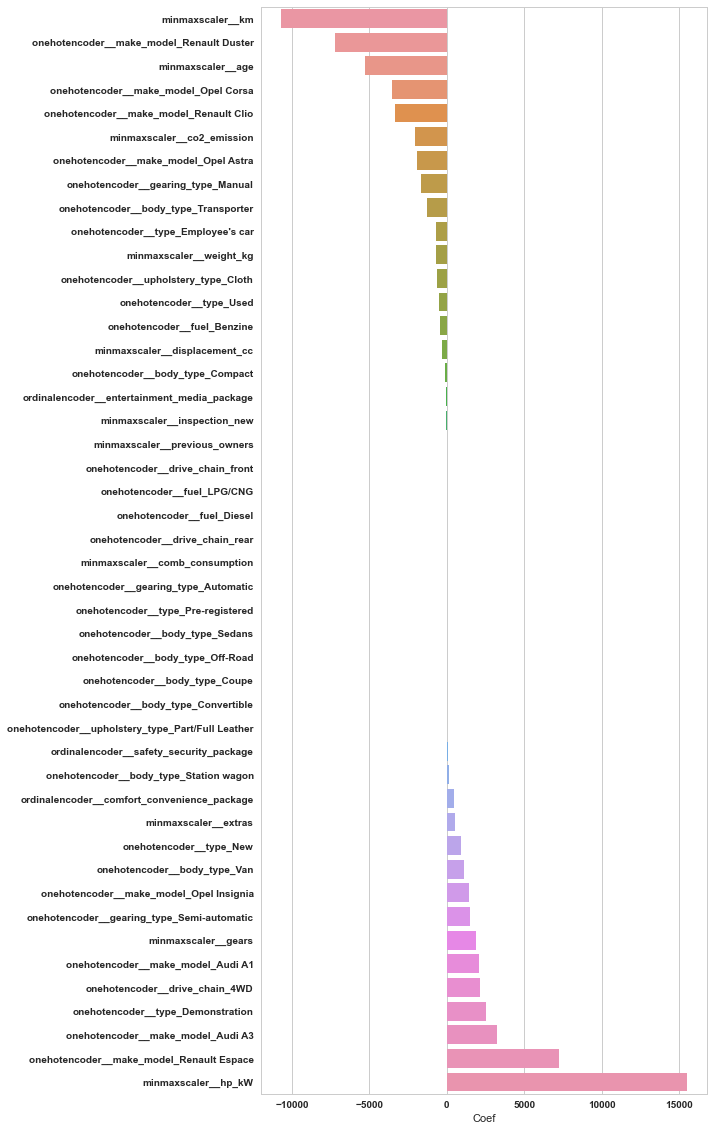

In [257]:
plt.figure(figsize=(8,20))
sns.barplot(data=feature_imp_df, x=feature_imp_df.Coef, y=feature_imp_df.index);

In [272]:
df.columns

Index(['make_model', 'body_type', 'km', 'type', 'previous_owners',
       'inspection_new', 'gearing_type', 'drive_chain', 'fuel', 'co2_emission',
       'extras', 'gears', 'age', 'hp_kW', 'upholstery_type', 'displacement_cc',
       'weight_kg', 'comb_consumption', 'comfort_convenience_package',
       'entertainment_media_package', 'safety_security_package', 'price'],
      dtype='object')

In [273]:
df_new = df2[["make_model", "hp_kW", "km","age", "gearing_type", "gears", "type", "price"]]

# tahminlemeye en fazla etkisi olan ilk 7 feature seçiyoruz. Burda make_model feature neden seçildi şeklinde bir soru 
# gelebilir. Yukardaki görsel incelendiğinde tahminlemeye en fazla etkisi olan featurlar arasında make_model featurenın
# unique kategorik gözlemlerini(Audi A3, AudiA1, Renault Espace vb) olduğunu gördüğümüzden make_model featuranı da seçtik.


In [274]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
X_train.head()

,make_model,hp_kW,km,age,gearing_type,gears,type
12840,Renault Clio,87.000,26077.000,1.000,Automatic,6.000,Employee's car
9024,Opel Corsa,51.000,59000.000,2.000,Manual,5.000,Used
15391,Renault Espace,165.000,250.000,0.000,Automatic,7.000,Pre-registered
335,Audi A1,70.000,65000.000,3.000,Automatic,7.000,Used
8303,Opel Corsa,66.000,28913.000,2.000,Automatic,6.000,Used


In [278]:
cat = X_train.select_dtypes("object").columns
num = X_train.select_dtypes("number").columns
cat, num

(Index(['make_model', 'gearing_type', 'type'], dtype='object'),
 Index(['hp_kW', 'km', 'age', 'gears'], dtype='object'))

In [280]:
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)
scaler = MinMaxScaler()

In [281]:
column_trans = make_column_transformer((encoder, cat), (scaler, num), remainder="passthrough")
operations = [("Scaler_Encoder", column_trans), ("Lasso", Lasso(alpha=1.02))]
lasso_ff_model = Pipeline(operations)
lasso_ff_model.fit(X_train, y_train)

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['make_model', 'gearing_type', 'type'], dtype='object')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['hp_kW', 'km', 'age', 'gears'], dtype='object'))])),
                ('Lasso', Lasso(alpha=1.02))])

In [283]:
train_val(lasso_ff_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.881,0.883
mae,1660.509,1633.095
mse,5482583.889,5244395.306
rmse,2341.492,2290.064


## Cross Validation

In [284]:
lasso_ff_model = Pipeline(steps=operations)

scores = cross_validate(lasso_ff_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                        'neg_root_mean_squared_error'], 
                        cv=10, return_train_score=True)
scores = pd.DataFrame(scores)
scores.iloc[:,2:].mean()

test_r2                                    0.880
train_r2                                   0.881
test_neg_mean_absolute_error           -1663.424
train_neg_mean_absolute_error          -1660.389
test_neg_mean_squared_error         -5503001.077
train_neg_mean_squared_error        -5481510.303
test_neg_root_mean_squared_error       -2343.471
train_neg_root_mean_squared_error      -2341.232
dtype: float64

## 7. Visually Compare Models Performance In a Graph

In [286]:
Final_score = train_val(lasso_ff_model, X_train, y_train, X_test, y_test).rename(
                columns = {"train":"Final_train", "test":"Final_test"})
compare_score = pd.concat([compare_score, Final_score], axis=1)
compare_score

,linear_train,linear_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test,Elastic_train,Elastic_test,Final_train,Final_test
R2,0.886,0.889,0.886,0.890,0.886,0.890,0.886,0.890,0.881,0.883
mae,1637.358,1607.618,1635.049,1601.974,1635.049,1601.974,1635.049,1601.974,1660.509,1633.095
mse,5222336.504,4977197.908,5219516.151,4952148.265,5219516.151,4952148.265,5219516.151,4952148.265,5482583.889,5244395.306
rmse,2285.243,2230.963,2284.626,2225.342,2284.626,2225.342,2284.626,2225.342,2341.492,2290.064


In [298]:
compare_score.T.sort_values(by="R2").style.highlight_max(color="red")

,R2,mae,mse,rmse
Final_train,0.880716,1660.509347,5482583.888577,2341.491808
Final_test,0.883033,1633.094567,5244395.306398,2290.064476
linear_train,0.886379,1637.357996,5222336.503550,2285.243204
Ridge_train,0.886440,1635.049140,5219516.151412,2284.626042
Lasso_train,0.886440,1635.049140,5219516.151412,2284.626042
Elastic_train,0.886440,1635.049140,5219516.151412,2284.626042
linear_test,0.888992,1607.617941,4977197.907712,2230.963448
Ridge_test,0.889551,1601.974246,4952148.264936,2225.342280
Lasso_test,0.889551,1601.974246,4952148.264936,2225.342280
Elastic_test,0.889551,1601.974246,4952148.264936,2225.342280


## Prediction a new observation
- Create an observation and predict its price

In [299]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [300]:
X.head()

,make_model,hp_kW,km,age,gearing_type,gears,type
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used


In [301]:
column_trans = make_column_transformer((encoder, cat), (scaler, num), remainder="passthrough")
operations = [("Scaler_Encoder", column_trans), ("Lasso", Lasso(alpha=1.02))]
final_model = Pipeline(operations)
final_model.fit(X,y)
# Scorlardaki değişim az olduğu için ve 7 feature ile lasso modelini seçiyorum.
# yukarıda bulduğumuz en iyi hyper parametre ile modeli kuruyoruz.

Pipeline(steps=[('Scaler_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['make_model', 'gearing_type', 'type'], dtype='object')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(),
                                                  Index(['hp_kW', 'km', 'age', 'gears'], dtype='object'))])),
                ('Lasso', Lasso(alpha=1.02))])

In [307]:
X.head()

,make_model,hp_kW,km,age,gearing_type,gears,type
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000,Used
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000,Used
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000,Used
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000,Used
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000,Used


## Prediction Test

In [314]:
df.head()

,make_model,body_type,km,type,previous_owners,inspection_new,gearing_type,drive_chain,fuel,co2_emission,extras,gears,age,hp_kW,upholstery_type,displacement_cc,weight_kg,comb_consumption,comfort_convenience_package,entertainment_media_package,safety_security_package,price
0,Audi A1,Sedans,56013.000,Used,2.000,1,Automatic,front,Diesel,99.000,3,7.000,3.000,66.000,Cloth,1422.000,1220.000,3.800,Premium,Plus,Safety Premium Package,15770
1,Audi A1,Sedans,80000.000,Used,2.000,0,Automatic,front,Benzine,129.000,4,7.000,2.000,141.000,Cloth,1798.000,1255.000,5.600,Standard,Plus,Safety Premium Package,14500
2,Audi A1,Sedans,83450.000,Used,1.000,0,Automatic,front,Diesel,99.000,2,7.000,3.000,85.000,Cloth,1598.000,1135.000,3.800,Premium,Standard,Safety Premium Package,14640
3,Audi A1,Sedans,73000.000,Used,1.000,0,Automatic,front,Diesel,99.000,3,6.000,3.000,66.000,Cloth,1422.000,1195.000,3.800,Standard,Plus,Safety Premium Package,14500
4,Audi A1,Sedans,16200.000,Used,1.000,1,Automatic,front,Diesel,109.000,4,7.000,3.000,66.000,Cloth,1422.000,1135.000,4.100,Premium,Plus,Safety Premium Package,16790


In [325]:
final_model.predict(df.head())

array([15429.40406162, 22050.30418199, 15994.71467299, 14138.4186444 ,
       16674.19972037])

## Model Deployment

In [326]:
import pickle
pickle.dump(final_model, open("final_lasso_model", "wb"))

In [327]:
model_hearing = pickle.load(open("final_lasso_model", "rb"))

In [328]:
model_hearing.predict(df.head())

array([15429.40406162, 22050.30418199, 15994.71467299, 14138.4186444 ,
       16674.19972037])